In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer, LancasterStemmer

In [2]:
def read_articles(file_name):
    with open(file_name, "r") as handle:
        article_all_lines = handle.readlines()
    
    article_all_lines = [line.replace("\n", "") for line in article_all_lines]
    
    start_art_idx = []
    for idx, line in enumerate(article_all_lines):
        if line.startswith("@"):
            start_art_idx.append(idx)
    
    idx_parirs = list(zip(start_art_idx[:-1], start_art_idx[1:])) + [(start_art_idx[-1], None)]
    #print(idx_parirs)
    articles = []
    for s_idx, e_idx in idx_parirs:
        articles.append(article_all_lines[s_idx: e_idx])
    return articles

In [3]:
def look_for_field(field, lines_per_article):
    s_idx = -1
    for idx, line in enumerate(lines_per_article):
        if line.startswith(field + " "):
            s_idx = idx
    
    e_idx = s_idx
    idx = s_idx
    while True:
        idx += 1
        if lines_per_article[idx].startswith(" "):
            e_idx = idx
        else:
            break
    e_idx += 1
    return s_idx, e_idx

In [4]:
def extract_field(field, lines_per_article):
    s_idx, e_idx = look_for_field(field, lines_per_article)
    if s_idx == -1:
        return None
    
    extracted_lines = lines_per_article[s_idx: e_idx]
    
    extracted_lines = [line.replace(field, "") for line in extracted_lines]
    extracted_lines = [line.replace("=", "") for line in extracted_lines]

    extracted_lines = [line.replace("{", "") for line in extracted_lines]
    extracted_lines = [line.replace("},", "") for line in extracted_lines]
    extracted_lines = [line.replace("}", "") for line in extracted_lines]
    
    extracted_lines = [line.strip() for line in extracted_lines]
    
    return " ".join(extracted_lines)

In [5]:
def extract_fields(fields, lines_per_article):
    art = {field: extract_field(field, lines_per_article) for field in fields}
    return art

In [6]:
def create_pub_df(bib_file, fields):
    articles = read_articles(bib_file)
    df = [extract_fields(fields, art) for art in articles]
    return pd.DataFrame(df)

In [7]:
BIB_FILE = "savedrecs.bib"
FIELDS = ["Author", "Title", "Journal", "Year", "Abstract", 
          "Keywords-Plus", "Keywords", "Research-Areas", "Web-of-Science-Categories",
         "Author-Email", "Journal-ISO"]

In [8]:
df = create_pub_df(BIB_FILE, FIELDS)
df.head()

,Abstract,Author,Author-Email,Journal,Journal-ISO,Keywords,Keywords-Plus,Research-Areas,Title,Web-of-Science-Categories,Year
0,"In the present problem, two-phase mixed convec...","Li, Zhixiong and Barnoon, Pouya and Toghraie, ...",lzx\_520@163.com masoud.afrand@tdtu.edu.vn,ADVANCED POWDER TECHNOLOGY,Adv. Powder Technol.,Two phase; H-shaped; Mixed convection; Porous;...,ENTROPY GENERATION ANALYSIS; LID-DRIVEN CAVITY...,Engineering,Mixed convection of non-Newtonian nanofluid in...,"Engineering, Chemical",2019
1,The most crucial step towards conducting exper...,"Asadi, Amin and Pourfattah, Farzad and Szilagy...",nguyenminhhoang1@tdtu.edu.vn omid.mahian@xjtu....,ULTRASONICS SONOCHEMISTRY,Ultrason. Sonochem.,Ultrasonic treatment; Ultrasonication time; Ul...,EFFECTIVE THERMAL-CONDUCTIVITY; ARTIFICIAL NEU...,Acoustics; Chemistry,Effect of sonication characteristics on stabil...,"Acoustics; Chemistry, Multidisciplinary",2019
2,The boiling heat transfer is one of the most w...,"Etedali, Sasan and Afrand, Masoud and Abdollah...",masoud.afrand@pmc.iaun.ac.ir,INTERNATIONAL JOURNAL OF THERMAL SCIENCES,Int. J. Therm. Sci.,Pool boiling; DI water/SiO2 nanofluid; Surfact...,THERMAL PERFORMANCE; ETHYLENE-GLYCOL; TRANSFER...,Thermodynamics; Engineering,Effect of different surfactants on the pool bo...,"Thermodynamics; Engineering, Mechanical",2019
3,"In this study, molecular dynamics simulation o...","Toghraie, Davood and Hekmatifar, Maboud and Sa...",masoud.afrand@tdtu.edu.vn,CHEMICAL PHYSICS,Chem. Phys.,Molecular dynamics simulation; Couette flow; P...,THERMAL-CONDUCTIVITY; WATER/AL2O3 NANOFLUID; S...,Chemistry; Physics,Molecular dynamics simulation of Couette and P...,"Chemistry, Physical; Physics, Atomic, Molecula...",2019
4,In this paper a brief review on application of...,"Pordanjani, Ahmad Hajatzadeh and Aghakhani, Sa...",masoud.afrand@tdtu.edu.vn Boshra.mahmoudi@spu....,ENERGY CONVERSION AND MANAGEMENT,Energy Conv. Manag.,Nanofluid; Plate heat exchanger; Helical heat ...,THERMO-PHYSICAL PROPERTIES; MHD NATURAL-CONVEC...,Thermodynamics; Energy \& Fuels; Mechanics,An updated review on application of nanofluids...,Thermodynamics; Energy \& Fuels; Mechanics,2019


In [9]:
df["Year"] = df["Year"].astype("int")

In [10]:
df["Afrand_is_Corresp_Aut"] = df["Author-Email"].str.contains("afrand")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Abstract                     153 non-null object
Author                       155 non-null object
Author-Email                 154 non-null object
Journal                      155 non-null object
Journal-ISO                  155 non-null object
Keywords                     148 non-null object
Keywords-Plus                153 non-null object
Research-Areas               155 non-null object
Title                        155 non-null object
Web-of-Science-Categories    155 non-null object
Year                         155 non-null int64
Afrand_is_Corresp_Aut        154 non-null object
dtypes: int64(1), object(11)
memory usage: 14.6+ KB


# Number of publications by Year

Text(0.5,1,'Afrand is a corresp. author')

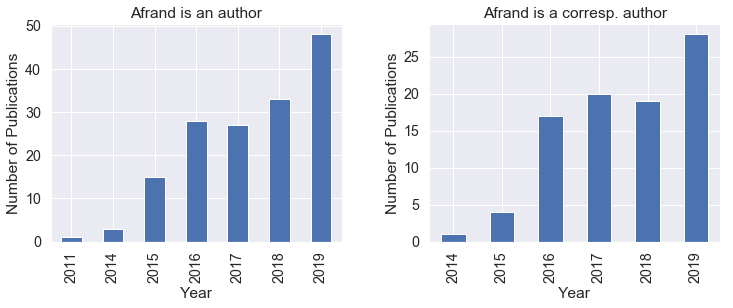

In [12]:
sns.set(font_scale=1.3)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

df["Year"].value_counts().sort_index().plot(kind="bar", ax=ax[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Publications")
ax[0].set_title("Afrand is an author")

df.loc[df["Afrand_is_Corresp_Aut"] == True ,"Year"].value_counts().sort_index().plot(kind="bar", ax=ax[1])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of Publications")
ax[1].set_title("Afrand is a corresp. author")

In [13]:
df_11_14 = df[df["Year"] <= 2014]
df_15_18 = df[(df["Year"] >= 2015) & (df["Year"] <= 2018)]
df_19 = df[df["Year"] >= 2019]

# Most frequent journals

In [14]:
jour_11_14 = df_11_14["Journal-ISO"]
jour_15_18 = df_15_18["Journal-ISO"]
jour_19 = df_19["Journal-ISO"]

Text(0.5,0,'frequency')

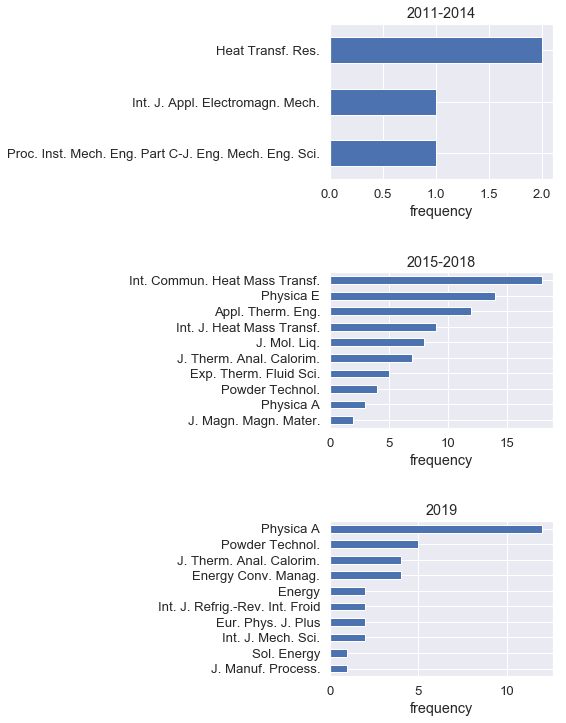

In [15]:
sns.set(font_scale=1.2)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(4, 12))
plt.subplots_adjust(hspace=0.6)

jour_11_14.value_counts()[:10].sort_values(ascending=True).plot(kind="barh", ax=ax[0])
ax[0].set_title("2011-2014")
ax[0].set_xlabel("frequency")

jour_15_18.value_counts()[:10].sort_values(ascending=True).plot(kind="barh", ax=ax[1])
ax[1].set_title("2015-2018")
ax[1].set_xlabel("frequency")

jour_19.value_counts()[:10].sort_values(ascending=True).plot(kind="barh", ax=ax[2])
ax[2].set_title("2019")
ax[2].set_xlabel("frequency")

Text(0.5,1,'2019')

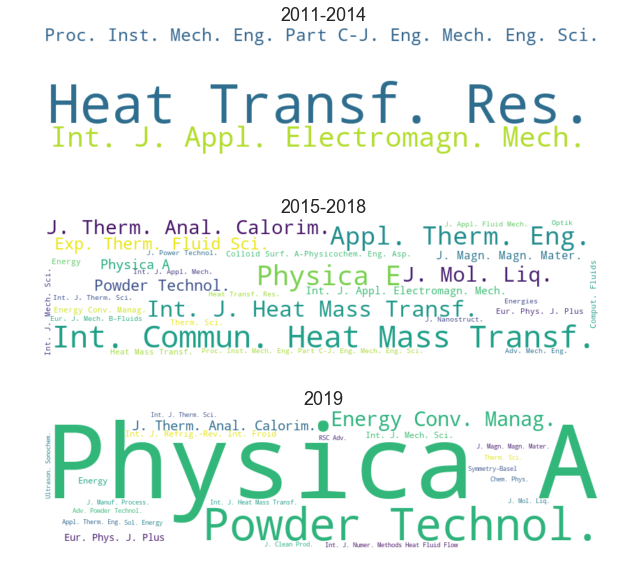

In [16]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

wcl_11_14 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(jour_11_14.dropna().values))

ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")


wcl_15_18 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(jour_15_18.dropna().values))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")


wcl_19 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(jour_19.dropna().values))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")

# Most common research areas

In [17]:
res_areas_11_14 = []
for s in df_11_14["Research-Areas"].values:
    res_areas_11_14.extend(s.split(";"))

res_areas_11_14 = [s.strip() for s in res_areas_11_14]
res_areas_11_14 = [s.replace("\\", "") for s in res_areas_11_14]

In [18]:
res_areas_15_18 = []
for s in df_15_18["Research-Areas"].values:
    res_areas_15_18.extend(s.split(";"))

res_areas_15_18 = [s.strip() for s in res_areas_15_18]
res_areas_15_18 = [s.replace("\\", "") for s in res_areas_15_18]

In [19]:
res_areas_19 = []
for s in df_19["Research-Areas"].values:
    res_areas_19.extend(s.split(";"))

res_areas_19 = [s.strip() for s in res_areas_19]
res_areas_19 = [s.replace("\\", "") for s in res_areas_19]

Text(0.5,1,'2019')

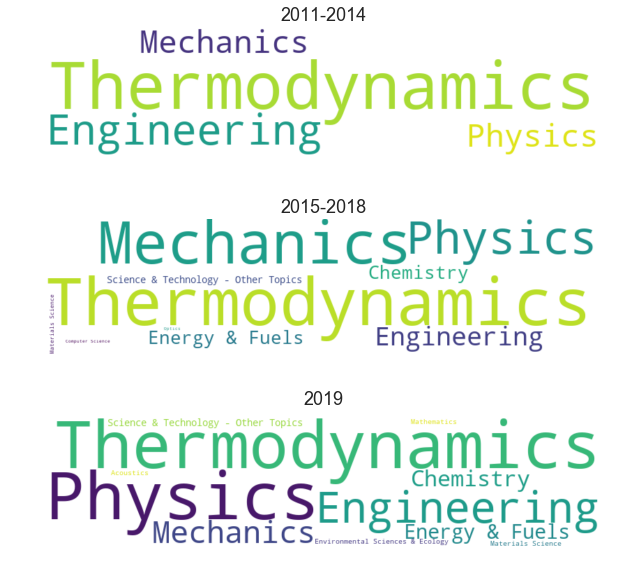

In [20]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

wcl_11_14 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(res_areas_11_14))

ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")

wcl_15_18 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(res_areas_15_18))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")


wcl_19 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(res_areas_19))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")

# Most common Web-of-Science Categories	

In [21]:
wos_cat_11_14 = []
for s in df_11_14["Web-of-Science-Categories"].values:
    wos_cat_11_14.extend(s.split(";"))

wos_cat_11_14 = [s.strip() for s in wos_cat_11_14]
wos_cat_11_14 = [s.replace("\\", "") for s in wos_cat_11_14]

In [22]:
wos_cat_15_18 = []
for s in df_15_18["Web-of-Science-Categories"].values:
    wos_cat_15_18.extend(s.split(";"))

wos_cat_15_18 = [s.strip() for s in wos_cat_15_18]
wos_cat_15_18 = [s.replace("\\", "") for s in wos_cat_15_18]

In [23]:
wos_cat_19 = []
for s in df_19["Web-of-Science-Categories"].values:
    wos_cat_19.extend(s.split(";"))

wos_cat_19 = [s.strip() for s in wos_cat_19]
wos_cat_19 = [s.replace("\\", "") for s in wos_cat_19]

Text(0.5,1,'2019')

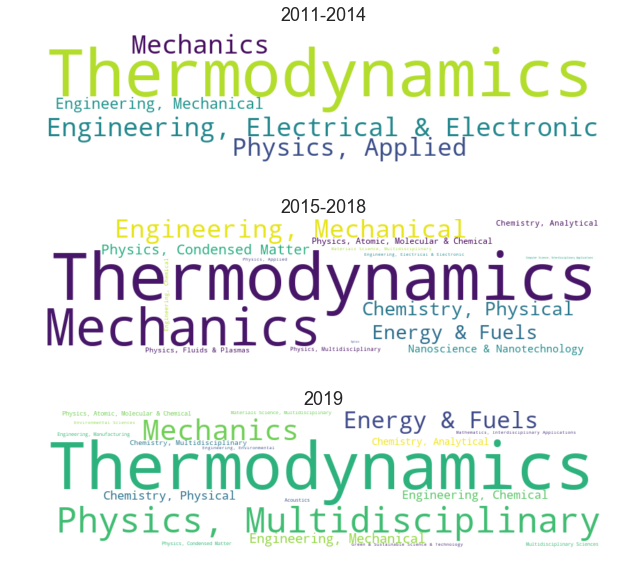

In [24]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

wcl_11_14 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(wos_cat_11_14))

ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")

wcl_15_18 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(wos_cat_15_18))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")

wcl_19 = WordCloud(max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(wos_cat_19))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")

# Most frequently occurring keywords

In [26]:
kw_11_14 = []
for s in df_11_14["Keywords"].dropna().values:
    kw_11_14.extend(s.split(";"))
for s in df_11_14["Keywords-Plus"].dropna().values:
    kw_11_14.extend(s.split(";"))

kw_11_14 = [s.strip().lower() for s in kw_11_14]

In [29]:
kw_15_18 = []
for s in df_15_18["Keywords"].dropna().values:
    kw_15_18.extend(s.split(";"))
for s in df_15_18["Keywords-Plus"].dropna().values:
    kw_15_18.extend(s.split(";"))

kw_15_18 = [s.strip().lower() for s in kw_15_18]

In [27]:
kw_19 = []
for s in df_19["Keywords"].dropna().values:
    kw_19.extend(s.split(";"))
for s in df_19["Keywords-Plus"].dropna().values:
    kw_19.extend(s.split(";"))

kw_19 = [s.strip().lower() for s in kw_19]

Text(0.5,1,'2019')

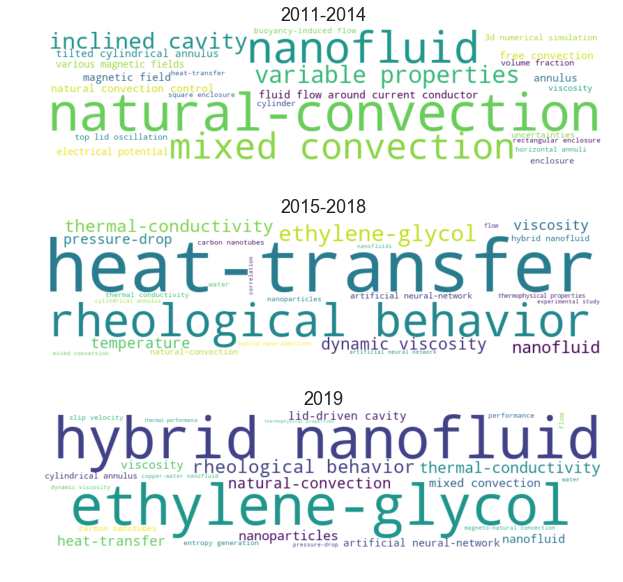

In [30]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

wcl_11_14 = WordCloud(max_words=25, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(kw_11_14))

ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")

wcl_15_18 = WordCloud(max_words=25, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(kw_15_18))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")

wcl_19 = WordCloud(max_words=25, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(kw_19))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")

# Most frequent co-corresponding authors by email
Among papers in which Afrand is a corresponding author, who else are also corresponding author?

In [31]:
em_11_14 = []
for s in df_11_14.loc[df_11_14["Afrand_is_Corresp_Aut"]==True, "Author-Email"].dropna().values:
    em_11_14.extend(s.split())

em_11_14 = [s.strip() for s in em_11_14]
em_11_14 = [s for s in em_11_14 if "afrand" not in s]

In [32]:
em_15_18 = []
for s in df_15_18.loc[df_15_18["Afrand_is_Corresp_Aut"]==True, "Author-Email"].dropna().values:
    em_15_18.extend(s.split())

em_15_18 = [s.strip() for s in em_15_18]
em_15_18 = [s for s in em_15_18 if "afrand" not in s]

In [33]:
em_19 = []
for s in df_19.loc[df_19["Afrand_is_Corresp_Aut"]==True, "Author-Email"].dropna().values:
    em_19.extend(s.split())

em_19 = [s.strip() for s in em_19]
em_19 = [s for s in em_19 if "afrand" not in s]

Text(0.5,1,'2019')

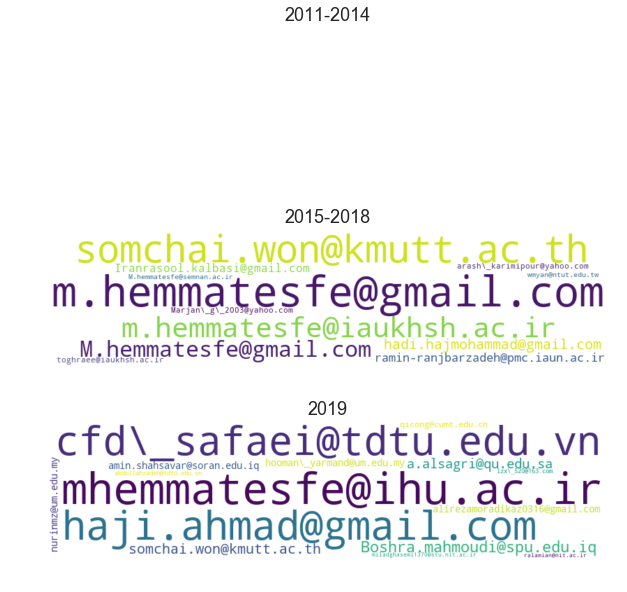

In [36]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

#wcl_11_14 = WordCloud(max_words=15, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
#    Counter(em_11_14))

#ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")

wcl_15_18 = WordCloud(max_words=15, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(em_15_18))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")

wcl_19 = WordCloud(max_words=15, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(em_19))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")

# Most frequent co-authors by name

In [40]:
au_11_14 = []
for s in df_11_14["Author"].dropna().values:
    au_11_14.extend(s.split("and"))

au_11_14 = [s.strip() for s in au_11_14]
au_11_14 = [s for s in au_11_14 if "Afrand" not in s]
au_11_14 = [s for s in au_11_14 if "Masoud" not in s]
au_11_14 = [s for s in au_11_14 if "Afr" not in s]

In [37]:
au_15_18 = []
for s in df_15_18["Author"].dropna().values:
    au_15_18.extend(s.split("and"))

au_15_18 = [s.strip() for s in au_15_18]
au_15_18 = [s for s in au_15_18 if "Afrand" not in s]
au_15_18 = [s for s in au_15_18 if "Masoud" not in s]
au_15_18 = [s for s in au_15_18 if "Afr" not in s]

In [38]:
au_19 = []
for s in df_19["Author"].dropna().values:
    au_19.extend(s.split("and"))

au_19 = [s.strip() for s in au_19]
au_19 = [s for s in au_19 if "Afrand" not in s]
au_19 = [s for s in au_19 if "Masoud" not in s]
au_19 = [s for s in au_19 if "Afr" not in s]

Text(0.5,1,'2019')

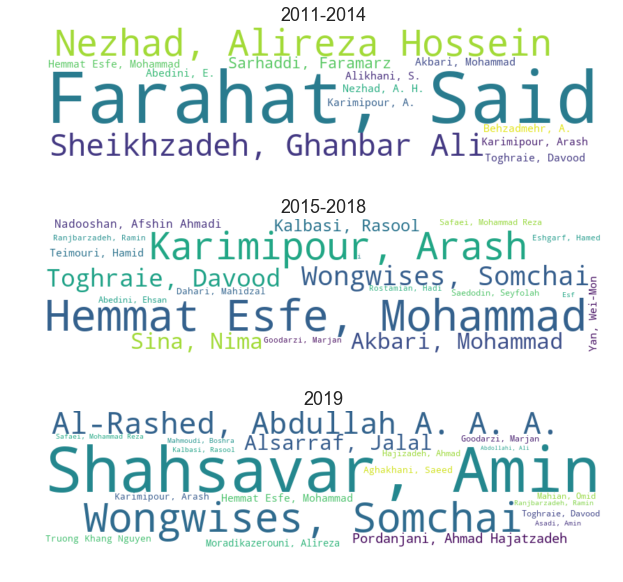

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

wcl_11_14 = WordCloud(max_words=20, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(au_11_14))

ax[0].imshow(wcl_11_14, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("2011-2014")

wcl_15_18 = WordCloud(max_words=20, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(au_15_18))

ax[1].imshow(wcl_15_18, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("2015-2018")

wcl_19 = WordCloud(max_words=20, max_font_size=200, width=800, background_color="white").generate_from_frequencies(
    Counter(au_19))

ax[2].imshow(wcl_19, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("2019")